In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# data preparation with sql queries
# SQL queries to export data to csv format

# For munich.csv:
#SELECT avg_temp,year FROM city_data
#WHERE city = 'Munich';

# For global_data.csv:
#SELECT * FROM global_data


In [143]:
muc_data    = pd.read_csv("ud_projects/Project1/munich.csv")
global_data = pd.read_csv("ud_projects/Project1/global_data.csv")
#temp.columns = ['avg_temp_muc', 'year_muc']

In [144]:
#frames = [temp, global_data]
#result = pd.concat(frames, axis=1, join='inner')
global_data

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [145]:
# calc moving average for 7 years
muc_data['avg_temp_7yr']    = muc_data.avg_temp.rolling(window=7).mean()
global_data['avg_temp_7yr'] = global_data.avg_temp.rolling(window=7).mean()



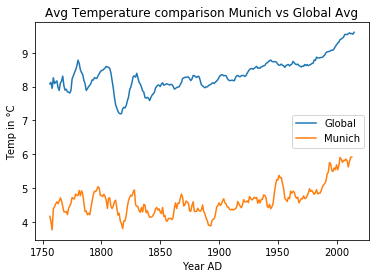

In [146]:
# plot avg temp munich vs global avg temp
h1, = plt.plot(global_data.year, global_data.avg_temp_7yr)
h2, = plt.plot(muc_data.year, muc_data.avg_temp_7yr)
plt.title('Avg Temperature comparison Munich vs Global Avg')
plt.xlabel('Year AD')
plt.ylabel('Temp in °C')
plt.legend([h1,h2], ['Global', 'Munich'])
plt.show()

In [147]:
# normalize for better comparison
muc_data['norm_temp']    = muc_data.avg_temp_7yr - np.mean(muc_data.avg_temp_7yr)
global_data['norm_temp'] = global_data.avg_temp_7yr - np.mean(global_data.avg_temp_7yr)


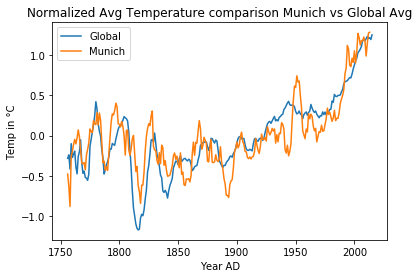

In [148]:
# plot normalized temp munich vs global avg temp
h1, = plt.plot(global_data.year, global_data.norm_temp)
h2, = plt.plot(muc_data.year, muc_data.norm_temp)
plt.title('Normalized Avg Temperature comparison Munich vs Global Avg')
plt.xlabel('Year AD')
plt.ylabel('Temp in °C')
plt.legend([h1,h2], ['Global', 'Munich'])
plt.show()

In [149]:
# observation #1:
diff_global = np.nanmean(np.diff(global_data.avg_temp_7yr))
diff_muc    = np.nanmean(np.diff(muc_data.avg_temp_7yr))
print("Both temperatures developments follow the same ascending trend with an average \npositive temperature increse of %1.4fK (Munich) and %1.4fK (Global)." % (diff_muc, diff_global))


Both temperatures developments follow the same ascending trend with an average 
positive temperature increse of 0.0068K (Munich) and 0.0059K (Global).


In [150]:
# observation #2:
diff_avg_temp = np.abs(np.nanmean(global_data.avg_temp_7yr) - np.nanmean(muc_data.avg_temp_7yr))
print("Munich is on avg %1.2fK colder than the Global Avg." % (diff_avg_temp))


Munich is on avg 3.73K colder than the Global Avg.


In [151]:
# obersavation #3:
print("Munich has - as well as the world - its highest descending temperature trend in the \nfirst quarter of the 19th century.")


Munich has - as well as the world - its highest descending temperature trend in the 
first quarter of the 19th century.


In [152]:
# observation #4:
print("Munich has - as well as the world - its highest ascending temperature trend \nreaching its peek, starting in the late 20th century.")


Munich has - as well as the world - its highest ascending temperature trend 
reaching its peek, starting in the late 20th century.


In [153]:
# oberservation #5:
print("There is a visual strong correlation between the global temperature trend and \nmunichs temperature trend. (if you dont consider the offset)")

There is a visual strong correlation between the global temperature trend and 
munichs temperature trend. (if you dont consider the offset)


In [154]:
# remark to observations
# All observations apply only to the data provided in the SQL Database, which goes back to arround 1750. 
# (which is most likley the beginning the beginning of the temperature measurements)